In [ ]:
!pip3 install vaderSentiment
! pip install --upgrade vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
import sys
!{sys.executable} -m pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np

In [13]:
# loading and cleaning billboard
billboardHot100 = pd.read_csv('data/billboardHot100_1999-2019.csv')
billboardHot100 = billboardHot100[['Artists', 'Name', 'Genre', 'Peak.position', 'Weeks.on.chart','Weekly.rank','Date','Lyrics']]
billboardHot100['Weeks.on.chart'] = billboardHot100['Weeks.on.chart'].fillna(1)
billboardHot100['Peak.position'] = billboardHot100['Peak.position'].fillna(100)
billboardHot100['Weekly.rank'] = billboardHot100['Weekly.rank'].fillna(100)
billboardHot100['Genre'] = billboardHot100['Genre'].fillna('None')
billboardHot100['Date'] = billboardHot100['Date'].fillna('1999')
billboardHot100 = billboardHot100.groupby(['Artists', 'Name','Genre', 'Lyrics']).agg({'Peak.position':'min', 'Weeks.on.chart':'max', 'Weekly.rank':'mean', 'Date':'max'})[['Peak.position','Weeks.on.chart','Weekly.rank', 'Date']].reset_index()
billboardHot100.rename(columns = {'Weekly.rank':'Avg.rank', 'Artists':'Artist'}, inplace = True)
billboardHot100['Date'] = pd.to_datetime(billboardHot100['Date'])
billboardHot100['Date'] = billboardHot100['Date'].apply(lambda x : x.year)
billboardHot100 = billboardHot100.applymap(lambda s: s.upper() if type(s) == str else s)
billboardHot100.head()

,Artist,Name,Genre,Lyrics,Peak.position,Weeks.on.chart,Avg.rank,Date
0,"""WEIRD AL"" YANKOVIC",CANADIAN IDIOT,"COMEDY,PARODY,ROCK",CANADIAN IDIOT \nDON'T WANNA BE A CANADIAN IDI...,82.0,3.0,91.333333,2006
1,"""WEIRD AL"" YANKOVIC",WORD CRIMES,"PARODY,COMEDY,POP",WORD CRIMES \nEVERYBODY SHUT UP! WOO!\nEVERYON...,39.0,2.0,65.000000,2014
2,'N SYNC,BYE BYE BYE,"ADULT CONTEMPORARY,DANCE-POP,TEEN POP,BOY BAND...","BYE BYE BYE \nHEY, HEY\nBYE, BYE, BYE\nBYE, BY...",4.0,23.0,14.260870,2000
3,'N SYNC,GONE,"ADULT CONTEMPORARY,ACOUSTIC,SOUL POP,R&;B,BOY ...",GONE \nTHERE'S A THOUSAND WORDS THAT I COULD S...,11.0,24.0,27.125000,2001
4,'N SYNC,IT'S GONNA BE ME,"MEMES,DANCE-POP,TEEN POP,BOY BAND,POP","IT'S GONNA BE ME \nIT'S GONNA BE ME\nOH, YEAH\...",1.0,25.0,21.680000,2000


In [21]:
all_lyrics = billboardHot100[['Name', 'Lyrics']]
analyzer = SentimentIntensityAnalyzer()

for song_lyrics in billboardHot100.Lyrics:
    vs = analyzer.polarity_scores(song_lyrics)
    print(vs)

{'neg': 0.106, 'neu': 0.769, 'pos': 0.126, 'compound': 0.6144}
{'neg': 0.075, 'neu': 0.684, 'pos': 0.241, 'compound': 0.9991}
{'neg': 0.116, 'neu': 0.768, 'pos': 0.116, 'compound': 0.2704}
{'neg': 0.057, 'neu': 0.767, 'pos': 0.175, 'compound': 0.9977}
{'neg': 0.087, 'neu': 0.747, 'pos': 0.166, 'compound': 0.9828}
{'neg': 0.085, 'neu': 0.851, 'pos': 0.064, 'compound': -0.9403}
{'neg': 0.026, 'neu': 0.733, 'pos': 0.241, 'compound': 0.995}
{'neg': 0.01, 'neu': 0.699, 'pos': 0.291, 'compound': 0.9991}
{'neg': 0.147, 'neu': 0.676, 'pos': 0.177, 'compound': 0.8715}
{'neg': 0.055, 'neu': 0.777, 'pos': 0.167, 'compound': 0.9938}
{'neg': 0.078, 'neu': 0.812, 'pos': 0.11, 'compound': 0.9636}
{'neg': 0.134, 'neu': 0.754, 'pos': 0.111, 'compound': -0.8182}
{'neg': 0.06, 'neu': 0.723, 'pos': 0.217, 'compound': 0.9977}
{'neg': 0.047, 'neu': 0.82, 'pos': 0.133, 'compound': 0.9951}
{'neg': 0.078, 'neu': 0.836, 'pos': 0.087, 'compound': -0.2337}
{'neg': 0.1, 'neu': 0.65, 'pos': 0.251, 'compound': 0.999

{'neg': 0.258, 'neu': 0.563, 'pos': 0.179, 'compound': -0.9986}
{'neg': 0.229, 'neu': 0.65, 'pos': 0.122, 'compound': -0.998}
{'neg': 0.141, 'neu': 0.759, 'pos': 0.1, 'compound': -0.9876}
{'neg': 0.06, 'neu': 0.694, 'pos': 0.246, 'compound': 0.9988}
{'neg': 0.15, 'neu': 0.708, 'pos': 0.142, 'compound': -0.9051}
{'neg': 0.147, 'neu': 0.662, 'pos': 0.19, 'compound': 0.9868}
{'neg': 0.061, 'neu': 0.683, 'pos': 0.256, 'compound': 0.9986}
{'neg': 0.201, 'neu': 0.629, 'pos': 0.17, 'compound': -0.9832}
{'neg': 0.164, 'neu': 0.654, 'pos': 0.182, 'compound': -0.5328}
{'neg': 0.219, 'neu': 0.487, 'pos': 0.295, 'compound': 0.9943}
{'neg': 0.055, 'neu': 0.789, 'pos': 0.156, 'compound': 0.9938}
{'neg': 0.016, 'neu': 0.796, 'pos': 0.188, 'compound': 0.9771}
{'neg': 0.196, 'neu': 0.701, 'pos': 0.104, 'compound': -0.9868}
{'neg': 0.295, 'neu': 0.669, 'pos': 0.035, 'compound': -0.9919}
{'neg': 0.035, 'neu': 0.758, 'pos': 0.207, 'compound': 0.9957}
{'neg': 0.05, 'neu': 0.775, 'pos': 0.175, 'compound': 0

{'neg': 0.005, 'neu': 0.545, 'pos': 0.45, 'compound': 0.9997}
{'neg': 0.052, 'neu': 0.579, 'pos': 0.369, 'compound': 0.999}
{'neg': 0.094, 'neu': 0.721, 'pos': 0.185, 'compound': 0.9925}
{'neg': 0.01, 'neu': 0.862, 'pos': 0.128, 'compound': 0.9831}
{'neg': 0.094, 'neu': 0.803, 'pos': 0.103, 'compound': 0.611}
{'neg': 0.118, 'neu': 0.602, 'pos': 0.281, 'compound': 0.9983}
{'neg': 0.16, 'neu': 0.739, 'pos': 0.101, 'compound': -0.8741}
{'neg': 0.042, 'neu': 0.846, 'pos': 0.113, 'compound': 0.8219}
{'neg': 0.033, 'neu': 0.77, 'pos': 0.196, 'compound': 0.9959}
{'neg': 0.034, 'neu': 0.596, 'pos': 0.37, 'compound': 0.9991}
{'neg': 0.102, 'neu': 0.783, 'pos': 0.114, 'compound': 0.6124}
{'neg': 0.007, 'neu': 0.879, 'pos': 0.114, 'compound': 0.9965}
{'neg': 0.012, 'neu': 0.785, 'pos': 0.203, 'compound': 0.9971}
{'neg': 0.04, 'neu': 0.78, 'pos': 0.18, 'compound': 0.9947}
{'neg': 0.256, 'neu': 0.573, 'pos': 0.171, 'compound': -0.9977}
{'neg': 0.058, 'neu': 0.836, 'pos': 0.105, 'compound': 0.9576}


{'neg': 0.23, 'neu': 0.631, 'pos': 0.138, 'compound': -0.996}
{'neg': 0.158, 'neu': 0.731, 'pos': 0.111, 'compound': -0.9217}
{'neg': 0.075, 'neu': 0.743, 'pos': 0.182, 'compound': 0.6105}
{'neg': 0.278, 'neu': 0.588, 'pos': 0.134, 'compound': -0.9985}
{'neg': 0.292, 'neu': 0.552, 'pos': 0.156, 'compound': -0.9958}
{'neg': 0.109, 'neu': 0.827, 'pos': 0.064, 'compound': -0.9212}
{'neg': 0.045, 'neu': 0.907, 'pos': 0.048, 'compound': 0.2695}
{'neg': 0.15, 'neu': 0.614, 'pos': 0.236, 'compound': 0.9698}
{'neg': 0.075, 'neu': 0.826, 'pos': 0.098, 'compound': 0.8767}
{'neg': 0.0, 'neu': 0.54, 'pos': 0.46, 'compound': 0.9755}
{'neg': 0.014, 'neu': 0.778, 'pos': 0.208, 'compound': 0.9954}
{'neg': 0.031, 'neu': 0.864, 'pos': 0.105, 'compound': 0.9505}
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.9966}
{'neg': 0.06, 'neu': 0.863, 'pos': 0.077, 'compound': 0.507}
{'neg': 0.124, 'neu': 0.705, 'pos': 0.171, 'compound': 0.9764}
{'neg': 0.092, 'neu': 0.784, 'pos': 0.124, 'compound': 0.9038

{'neg': 0.089, 'neu': 0.675, 'pos': 0.236, 'compound': 0.9985}
{'neg': 0.119, 'neu': 0.686, 'pos': 0.195, 'compound': 0.9943}
{'neg': 0.03, 'neu': 0.809, 'pos': 0.161, 'compound': 0.9022}
{'neg': 0.119, 'neu': 0.62, 'pos': 0.261, 'compound': 0.9984}
{'neg': 0.045, 'neu': 0.852, 'pos': 0.103, 'compound': 0.9837}
{'neg': 0.038, 'neu': 0.872, 'pos': 0.09, 'compound': 0.9714}
{'neg': 0.299, 'neu': 0.469, 'pos': 0.232, 'compound': -0.9952}
{'neg': 0.11, 'neu': 0.789, 'pos': 0.101, 'compound': -0.3459}
{'neg': 0.021, 'neu': 0.93, 'pos': 0.049, 'compound': 0.875}
{'neg': 0.041, 'neu': 0.91, 'pos': 0.048, 'compound': 0.4939}
{'neg': 0.164, 'neu': 0.689, 'pos': 0.147, 'compound': -0.833}
{'neg': 0.043, 'neu': 0.652, 'pos': 0.306, 'compound': 0.9996}
{'neg': 0.099, 'neu': 0.738, 'pos': 0.162, 'compound': 0.9955}
{'neg': 0.06, 'neu': 0.814, 'pos': 0.126, 'compound': 0.9963}
{'neg': 0.025, 'neu': 0.704, 'pos': 0.271, 'compound': 0.9989}
{'neg': 0.034, 'neu': 0.765, 'pos': 0.202, 'compound': 0.9992

{'neg': 0.016, 'neu': 0.863, 'pos': 0.121, 'compound': 0.991}
{'neg': 0.142, 'neu': 0.778, 'pos': 0.08, 'compound': -0.962}
{'neg': 0.141, 'neu': 0.617, 'pos': 0.242, 'compound': 0.9918}
{'neg': 0.052, 'neu': 0.89, 'pos': 0.057, 'compound': 0.7048}
{'neg': 0.107, 'neu': 0.789, 'pos': 0.105, 'compound': 0.4977}
{'neg': 0.135, 'neu': 0.601, 'pos': 0.264, 'compound': 0.9919}
{'neg': 0.088, 'neu': 0.787, 'pos': 0.126, 'compound': 0.8165}
{'neg': 0.043, 'neu': 0.764, 'pos': 0.193, 'compound': 0.9915}
{'neg': 0.141, 'neu': 0.747, 'pos': 0.112, 'compound': -0.8097}
{'neg': 0.122, 'neu': 0.791, 'pos': 0.087, 'compound': -0.9478}
{'neg': 0.044, 'neu': 0.848, 'pos': 0.108, 'compound': 0.9657}
{'neg': 0.033, 'neu': 0.747, 'pos': 0.221, 'compound': 0.9974}
{'neg': 0.073, 'neu': 0.799, 'pos': 0.128, 'compound': 0.962}
{'neg': 0.074, 'neu': 0.862, 'pos': 0.064, 'compound': -0.8097}
{'neg': 0.036, 'neu': 0.921, 'pos': 0.043, 'compound': 0.308}
{'neg': 0.004, 'neu': 0.851, 'pos': 0.145, 'compound': 0.

{'neg': 0.018, 'neu': 0.803, 'pos': 0.179, 'compound': 0.9942}
{'neg': 0.144, 'neu': 0.433, 'pos': 0.423, 'compound': 0.9995}
{'neg': 0.232, 'neu': 0.632, 'pos': 0.135, 'compound': -0.9788}
{'neg': 0.018, 'neu': 0.7, 'pos': 0.282, 'compound': 0.9981}
{'neg': 0.03, 'neu': 0.924, 'pos': 0.046, 'compound': 0.631}
{'neg': 0.051, 'neu': 0.821, 'pos': 0.128, 'compound': 0.9608}
{'neg': 0.046, 'neu': 0.911, 'pos': 0.043, 'compound': 0.6124}
{'neg': 0.041, 'neu': 0.824, 'pos': 0.135, 'compound': 0.9799}
{'neg': 0.065, 'neu': 0.816, 'pos': 0.119, 'compound': 0.9572}
{'neg': 0.111, 'neu': 0.709, 'pos': 0.18, 'compound': 0.9842}
{'neg': 0.063, 'neu': 0.686, 'pos': 0.251, 'compound': 0.9964}
{'neg': 0.017, 'neu': 0.86, 'pos': 0.123, 'compound': 0.9928}
{'neg': 0.016, 'neu': 0.827, 'pos': 0.156, 'compound': 0.9926}
{'neg': 0.013, 'neu': 0.716, 'pos': 0.271, 'compound': 0.9973}
{'neg': 0.053, 'neu': 0.808, 'pos': 0.139, 'compound': 0.9959}
{'neg': 0.03, 'neu': 0.714, 'pos': 0.256, 'compound': 0.9992

{'neg': 0.014, 'neu': 0.856, 'pos': 0.129, 'compound': 0.9825}
{'neg': 0.155, 'neu': 0.735, 'pos': 0.109, 'compound': -0.9902}
{'neg': 0.04, 'neu': 0.804, 'pos': 0.155, 'compound': 0.9957}
{'neg': 0.055, 'neu': 0.826, 'pos': 0.119, 'compound': 0.8331}
{'neg': 0.07, 'neu': 0.603, 'pos': 0.326, 'compound': 0.9976}
{'neg': 0.039, 'neu': 0.873, 'pos': 0.088, 'compound': 0.947}
{'neg': 0.059, 'neu': 0.92, 'pos': 0.022, 'compound': -0.8462}
{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compound': 0.9998}
{'neg': 0.05, 'neu': 0.674, 'pos': 0.276, 'compound': 0.9979}
{'neg': 0.079, 'neu': 0.857, 'pos': 0.064, 'compound': -0.7215}
{'neg': 0.121, 'neu': 0.82, 'pos': 0.059, 'compound': -0.9405}
{'neg': 0.155, 'neu': 0.704, 'pos': 0.141, 'compound': -0.9296}
{'neg': 0.031, 'neu': 0.848, 'pos': 0.121, 'compound': 0.9953}
{'neg': 0.159, 'neu': 0.756, 'pos': 0.086, 'compound': -0.9956}
{'neg': 0.086, 'neu': 0.839, 'pos': 0.075, 'compound': -0.9366}
{'neg': 0.081, 'neu': 0.531, 'pos': 0.388, 'compound': 0.9

{'neg': 0.034, 'neu': 0.769, 'pos': 0.197, 'compound': 0.9956}
{'neg': 0.019, 'neu': 0.84, 'pos': 0.141, 'compound': 0.9959}
{'neg': 0.075, 'neu': 0.855, 'pos': 0.071, 'compound': 0.7988}
{'neg': 0.03, 'neu': 0.907, 'pos': 0.063, 'compound': 0.9461}
{'neg': 0.06, 'neu': 0.735, 'pos': 0.205, 'compound': 0.9975}
{'neg': 0.117, 'neu': 0.842, 'pos': 0.041, 'compound': -0.9826}
{'neg': 0.08, 'neu': 0.669, 'pos': 0.252, 'compound': 0.9954}
{'neg': 0.083, 'neu': 0.796, 'pos': 0.122, 'compound': 0.9721}
{'neg': 0.083, 'neu': 0.727, 'pos': 0.191, 'compound': 0.9934}
{'neg': 0.071, 'neu': 0.76, 'pos': 0.169, 'compound': 0.9782}
{'neg': 0.066, 'neu': 0.711, 'pos': 0.222, 'compound': 0.9884}
{'neg': 0.126, 'neu': 0.591, 'pos': 0.283, 'compound': 0.9984}
{'neg': 0.196, 'neu': 0.714, 'pos': 0.091, 'compound': -0.9887}
{'neg': 0.145, 'neu': 0.664, 'pos': 0.191, 'compound': 0.977}
{'neg': 0.062, 'neu': 0.792, 'pos': 0.146, 'compound': 0.9889}
{'neg': 0.043, 'neu': 0.769, 'pos': 0.187, 'compound': 0.99

{'neg': 0.021, 'neu': 0.753, 'pos': 0.226, 'compound': 0.9988}
{'neg': 0.02, 'neu': 0.562, 'pos': 0.418, 'compound': 0.9999}
{'neg': 0.044, 'neu': 0.761, 'pos': 0.195, 'compound': 0.9934}
{'neg': 0.047, 'neu': 0.795, 'pos': 0.158, 'compound': 0.9946}
{'neg': 0.003, 'neu': 0.912, 'pos': 0.085, 'compound': 0.9915}
{'neg': 0.043, 'neu': 0.881, 'pos': 0.076, 'compound': 0.9761}
{'neg': 0.094, 'neu': 0.782, 'pos': 0.124, 'compound': 0.9098}
{'neg': 0.04, 'neu': 0.736, 'pos': 0.225, 'compound': 0.9992}
{'neg': 0.065, 'neu': 0.612, 'pos': 0.323, 'compound': 0.9983}
{'neg': 0.055, 'neu': 0.643, 'pos': 0.302, 'compound': 0.9983}
{'neg': 0.099, 'neu': 0.737, 'pos': 0.164, 'compound': 0.9755}
{'neg': 0.046, 'neu': 0.849, 'pos': 0.105, 'compound': 0.9485}
{'neg': 0.027, 'neu': 0.773, 'pos': 0.201, 'compound': 0.9967}
{'neg': 0.024, 'neu': 0.766, 'pos': 0.211, 'compound': 0.9953}
{'neg': 0.019, 'neu': 0.875, 'pos': 0.107, 'compound': 0.9268}
{'neg': 0.008, 'neu': 0.892, 'pos': 0.101, 'compound': 0.

{'neg': 0.031, 'neu': 0.872, 'pos': 0.097, 'compound': 0.9779}
{'neg': 0.049, 'neu': 0.722, 'pos': 0.229, 'compound': 0.9951}
{'neg': 0.101, 'neu': 0.737, 'pos': 0.162, 'compound': 0.9871}
{'neg': 0.022, 'neu': 0.785, 'pos': 0.192, 'compound': 0.9959}
{'neg': 0.086, 'neu': 0.811, 'pos': 0.103, 'compound': 0.8384}
{'neg': 0.051, 'neu': 0.629, 'pos': 0.32, 'compound': 0.9987}
{'neg': 0.024, 'neu': 0.821, 'pos': 0.156, 'compound': 0.9808}
{'neg': 0.009, 'neu': 0.767, 'pos': 0.224, 'compound': 0.9932}
{'neg': 0.064, 'neu': 0.767, 'pos': 0.169, 'compound': 0.9582}
{'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compound': -0.9269}
{'neg': 0.092, 'neu': 0.771, 'pos': 0.137, 'compound': 0.9913}
{'neg': 0.07, 'neu': 0.766, 'pos': 0.164, 'compound': 0.9836}
{'neg': 0.071, 'neu': 0.74, 'pos': 0.189, 'compound': 0.9824}
{'neg': 0.049, 'neu': 0.855, 'pos': 0.097, 'compound': 0.9347}
{'neg': 0.178, 'neu': 0.7, 'pos': 0.122, 'compound': -0.898}
{'neg': 0.008, 'neu': 0.82, 'pos': 0.172, 'compound': 0.9672}
{

{'neg': 0.228, 'neu': 0.607, 'pos': 0.165, 'compound': -0.961}
{'neg': 0.252, 'neu': 0.619, 'pos': 0.13, 'compound': -0.9951}
{'neg': 0.111, 'neu': 0.592, 'pos': 0.298, 'compound': 0.9962}
{'neg': 0.045, 'neu': 0.793, 'pos': 0.163, 'compound': 0.993}
{'neg': 0.123, 'neu': 0.718, 'pos': 0.158, 'compound': 0.9407}
{'neg': 0.046, 'neu': 0.699, 'pos': 0.254, 'compound': 0.9951}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.9427}
{'neg': 0.01, 'neu': 0.951, 'pos': 0.039, 'compound': 0.7096}
{'neg': 0.165, 'neu': 0.539, 'pos': 0.296, 'compound': 0.9839}
{'neg': 0.052, 'neu': 0.732, 'pos': 0.216, 'compound': 0.9957}
{'neg': 0.031, 'neu': 0.798, 'pos': 0.172, 'compound': 0.9886}
{'neg': 0.06, 'neu': 0.756, 'pos': 0.185, 'compound': 0.9934}
{'neg': 0.133, 'neu': 0.711, 'pos': 0.156, 'compound': 0.8174}
{'neg': 0.148, 'neu': 0.692, 'pos': 0.16, 'compound': 0.9037}
{'neg': 0.099, 'neu': 0.736, 'pos': 0.165, 'compound': 0.9908}
{'neg':

{'neg': 0.118, 'neu': 0.684, 'pos': 0.198, 'compound': 0.9977}
{'neg': 0.048, 'neu': 0.696, 'pos': 0.256, 'compound': 0.9968}
{'neg': 0.079, 'neu': 0.8, 'pos': 0.121, 'compound': 0.964}
{'neg': 0.062, 'neu': 0.775, 'pos': 0.163, 'compound': 0.9903}
{'neg': 0.046, 'neu': 0.822, 'pos': 0.132, 'compound': 0.9819}
{'neg': 0.032, 'neu': 0.862, 'pos': 0.106, 'compound': 0.9791}
{'neg': 0.033, 'neu': 0.801, 'pos': 0.166, 'compound': 0.9737}
{'neg': 0.16, 'neu': 0.73, 'pos': 0.11, 'compound': -0.8666}
{'neg': 0.165, 'neu': 0.716, 'pos': 0.119, 'compound': -0.9736}
{'neg': 0.054, 'neu': 0.862, 'pos': 0.085, 'compound': 0.8192}
{'neg': 0.084, 'neu': 0.771, 'pos': 0.145, 'compound': 0.9601}
{'neg': 0.01, 'neu': 0.631, 'pos': 0.358, 'compound': 0.9982}
{'neg': 0.098, 'neu': 0.779, 'pos': 0.123, 'compound': 0.8776}
{'neg': 0.088, 'neu': 0.786, 'pos': 0.125, 'compound': 0.9445}
{'neg': 0.045, 'neu': 0.736, 'pos': 0.219, 'compound': 0.9968}
{'neg': 0.04, 'neu': 0.85, 'pos': 0.109, 'compound': 0.9501}

{'neg': 0.166, 'neu': 0.659, 'pos': 0.175, 'compound': 0.8491}
{'neg': 0.096, 'neu': 0.717, 'pos': 0.187, 'compound': 0.9947}
{'neg': 0.119, 'neu': 0.659, 'pos': 0.223, 'compound': 0.9978}
{'neg': 0.181, 'neu': 0.664, 'pos': 0.156, 'compound': -0.9739}
{'neg': 0.017, 'neu': 0.871, 'pos': 0.111, 'compound': 0.8372}
{'neg': 0.076, 'neu': 0.669, 'pos': 0.255, 'compound': 0.999}
{'neg': 0.092, 'neu': 0.787, 'pos': 0.122, 'compound': 0.9351}
{'neg': 0.038, 'neu': 0.811, 'pos': 0.151, 'compound': 0.995}
{'neg': 0.141, 'neu': 0.744, 'pos': 0.115, 'compound': -0.9785}
{'neg': 0.175, 'neu': 0.799, 'pos': 0.026, 'compound': -0.9981}
{'neg': 0.137, 'neu': 0.724, 'pos': 0.139, 'compound': -0.1301}
{'neg': 0.055, 'neu': 0.792, 'pos': 0.153, 'compound': 0.9847}
{'neg': 0.203, 'neu': 0.601, 'pos': 0.197, 'compound': -0.9427}
{'neg': 0.104, 'neu': 0.724, 'pos': 0.172, 'compound': 0.9983}
{'neg': 0.021, 'neu': 0.897, 'pos': 0.082, 'compound': 0.9693}
{'neg': 0.104, 'neu': 0.747, 'pos': 0.149, 'compound

{'neg': 0.112, 'neu': 0.644, 'pos': 0.244, 'compound': 0.9984}
{'neg': 0.172, 'neu': 0.623, 'pos': 0.206, 'compound': 0.9679}
{'neg': 0.063, 'neu': 0.746, 'pos': 0.191, 'compound': 0.9953}
{'neg': 0.094, 'neu': 0.888, 'pos': 0.018, 'compound': -0.975}
{'neg': 0.046, 'neu': 0.568, 'pos': 0.386, 'compound': 0.9992}
{'neg': 0.141, 'neu': 0.747, 'pos': 0.111, 'compound': -0.8045}
{'neg': 0.065, 'neu': 0.77, 'pos': 0.165, 'compound': 0.9907}
{'neg': 0.114, 'neu': 0.786, 'pos': 0.1, 'compound': 0.431}
{'neg': 0.049, 'neu': 0.633, 'pos': 0.318, 'compound': 0.9989}
{'neg': 0.095, 'neu': 0.783, 'pos': 0.123, 'compound': 0.9675}
{'neg': 0.122, 'neu': 0.771, 'pos': 0.107, 'compound': -0.9012}
{'neg': 0.085, 'neu': 0.737, 'pos': 0.179, 'compound': 0.9785}
{'neg': 0.055, 'neu': 0.8, 'pos': 0.145, 'compound': 0.9933}
{'neg': 0.098, 'neu': 0.808, 'pos': 0.094, 'compound': 0.7815}
{'neg': 0.015, 'neu': 0.841, 'pos': 0.144, 'compound': 0.9933}
{'neg': 0.0, 'neu': 0.985, 'pos': 0.015, 'compound': 0.2023

{'neg': 0.073, 'neu': 0.789, 'pos': 0.137, 'compound': 0.9853}
{'neg': 0.048, 'neu': 0.708, 'pos': 0.244, 'compound': 0.9995}
{'neg': 0.082, 'neu': 0.675, 'pos': 0.243, 'compound': 0.9972}
{'neg': 0.374, 'neu': 0.539, 'pos': 0.087, 'compound': -0.9997}
{'neg': 0.104, 'neu': 0.821, 'pos': 0.075, 'compound': -0.8945}
{'neg': 0.025, 'neu': 0.858, 'pos': 0.117, 'compound': 0.9848}
{'neg': 0.158, 'neu': 0.648, 'pos': 0.193, 'compound': 0.8476}
{'neg': 0.231, 'neu': 0.614, 'pos': 0.154, 'compound': -0.9538}
{'neg': 0.207, 'neu': 0.712, 'pos': 0.081, 'compound': -0.9851}
{'neg': 0.111, 'neu': 0.784, 'pos': 0.104, 'compound': -0.8831}
{'neg': 0.041, 'neu': 0.869, 'pos': 0.09, 'compound': 0.9875}
{'neg': 0.157, 'neu': 0.589, 'pos': 0.254, 'compound': 0.9995}
{'neg': 0.143, 'neu': 0.771, 'pos': 0.087, 'compound': -0.9879}
{'neg': 0.164, 'neu': 0.626, 'pos': 0.211, 'compound': 0.9935}
{'neg': 0.078, 'neu': 0.776, 'pos': 0.146, 'compound': 0.9949}
{'neg': 0.111, 'neu': 0.739, 'pos': 0.15, 'compoun

{'neg': 0.043, 'neu': 0.849, 'pos': 0.107, 'compound': 0.9932}
{'neg': 0.011, 'neu': 0.682, 'pos': 0.307, 'compound': 0.9998}
{'neg': 0.047, 'neu': 0.855, 'pos': 0.098, 'compound': 0.9808}
{'neg': 0.061, 'neu': 0.782, 'pos': 0.156, 'compound': 0.9951}
{'neg': 0.066, 'neu': 0.849, 'pos': 0.086, 'compound': 0.8298}
{'neg': 0.013, 'neu': 0.909, 'pos': 0.078, 'compound': 0.9603}
{'neg': 0.072, 'neu': 0.772, 'pos': 0.156, 'compound': 0.9922}
{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.9946}
{'neg': 0.056, 'neu': 0.827, 'pos': 0.117, 'compound': 0.9765}
{'neg': 0.302, 'neu': 0.619, 'pos': 0.079, 'compound': -0.9994}
{'neg': 0.045, 'neu': 0.669, 'pos': 0.286, 'compound': 0.9985}
{'neg': 0.055, 'neu': 0.863, 'pos': 0.082, 'compound': 0.8451}
{'neg': 0.024, 'neu': 0.847, 'pos': 0.129, 'compound': 0.9932}
{'neg': 0.035, 'neu': 0.667, 'pos': 0.298, 'compound': 0.999}
{'neg': 0.025, 'neu': 0.892, 'pos': 0.083, 'compound': 0.9751}
{'neg': 0.056, 'neu': 0.868, 'pos': 0.076, 'compound': 0.

{'neg': 0.118, 'neu': 0.74, 'pos': 0.142, 'compound': 0.9484}
{'neg': 0.065, 'neu': 0.866, 'pos': 0.068, 'compound': 0.7613}
{'neg': 0.083, 'neu': 0.896, 'pos': 0.021, 'compound': -0.9937}
{'neg': 0.051, 'neu': 0.908, 'pos': 0.041, 'compound': -0.3775}
{'neg': 0.111, 'neu': 0.623, 'pos': 0.266, 'compound': 0.9996}
{'neg': 0.198, 'neu': 0.707, 'pos': 0.095, 'compound': -0.9987}
{'neg': 0.085, 'neu': 0.668, 'pos': 0.247, 'compound': 0.9989}
{'neg': 0.064, 'neu': 0.862, 'pos': 0.073, 'compound': 0.549}
{'neg': 0.06, 'neu': 0.894, 'pos': 0.046, 'compound': 0.1456}
{'neg': 0.039, 'neu': 0.934, 'pos': 0.027, 'compound': -0.1484}
{'neg': 0.01, 'neu': 0.835, 'pos': 0.155, 'compound': 0.9927}
{'neg': 0.129, 'neu': 0.731, 'pos': 0.14, 'compound': 0.3709}
{'neg': 0.095, 'neu': 0.681, 'pos': 0.224, 'compound': 0.9897}
{'neg': 0.072, 'neu': 0.669, 'pos': 0.259, 'compound': 0.9887}
{'neg': 0.05, 'neu': 0.833, 'pos': 0.117, 'compound': 0.9812}
{'neg': 0.059, 'neu': 0.667, 'pos': 0.274, 'compound': 0.

{'neg': 0.006, 'neu': 0.807, 'pos': 0.187, 'compound': 0.9961}
{'neg': 0.109, 'neu': 0.864, 'pos': 0.027, 'compound': -0.9443}
{'neg': 0.029, 'neu': 0.781, 'pos': 0.191, 'compound': 0.9971}
{'neg': 0.049, 'neu': 0.759, 'pos': 0.192, 'compound': 0.993}
{'neg': 0.073, 'neu': 0.497, 'pos': 0.431, 'compound': 0.9989}
{'neg': 0.236, 'neu': 0.743, 'pos': 0.021, 'compound': -0.999}
{'neg': 0.025, 'neu': 0.76, 'pos': 0.214, 'compound': 0.9934}
{'neg': 0.046, 'neu': 0.715, 'pos': 0.239, 'compound': 0.9934}
{'neg': 0.102, 'neu': 0.758, 'pos': 0.14, 'compound': 0.9485}
{'neg': 0.049, 'neu': 0.829, 'pos': 0.122, 'compound': 0.9818}
{'neg': 0.051, 'neu': 0.707, 'pos': 0.243, 'compound': 0.9991}
{'neg': 0.213, 'neu': 0.672, 'pos': 0.115, 'compound': -0.9847}
{'neg': 0.053, 'neu': 0.704, 'pos': 0.243, 'compound': 0.9989}
{'neg': 0.005, 'neu': 0.897, 'pos': 0.098, 'compound': 0.9847}
{'neg': 0.006, 'neu': 0.859, 'pos': 0.135, 'compound': 0.9937}
{'neg': 0.011, 'neu': 0.745, 'pos': 0.244, 'compound': 0

{'neg': 0.045, 'neu': 0.781, 'pos': 0.174, 'compound': 0.9829}
{'neg': 0.095, 'neu': 0.712, 'pos': 0.193, 'compound': 0.9968}
{'neg': 0.111, 'neu': 0.668, 'pos': 0.22, 'compound': 0.9545}
{'neg': 0.051, 'neu': 0.752, 'pos': 0.198, 'compound': 0.9955}
{'neg': 0.155, 'neu': 0.8, 'pos': 0.046, 'compound': -0.973}
{'neg': 0.071, 'neu': 0.786, 'pos': 0.143, 'compound': 0.9861}
{'neg': 0.107, 'neu': 0.617, 'pos': 0.276, 'compound': 0.9964}
{'neg': 0.183, 'neu': 0.674, 'pos': 0.143, 'compound': -0.7425}
{'neg': 0.04, 'neu': 0.816, 'pos': 0.144, 'compound': 0.9756}
{'neg': 0.049, 'neu': 0.58, 'pos': 0.37, 'compound': 0.9984}
{'neg': 0.073, 'neu': 0.835, 'pos': 0.092, 'compound': 0.1577}
{'neg': 0.242, 'neu': 0.63, 'pos': 0.128, 'compound': -0.9979}
{'neg': 0.097, 'neu': 0.832, 'pos': 0.071, 'compound': -0.3657}
{'neg': 0.059, 'neu': 0.654, 'pos': 0.287, 'compound': 0.996}
{'neg': 0.26, 'neu': 0.495, 'pos': 0.245, 'compound': -0.649}
{'neg': 0.046, 'neu': 0.89, 'pos': 0.064, 'compound': 0.7335}

{'neg': 0.079, 'neu': 0.733, 'pos': 0.188, 'compound': 0.9961}
{'neg': 0.017, 'neu': 0.731, 'pos': 0.252, 'compound': 0.9985}
{'neg': 0.079, 'neu': 0.712, 'pos': 0.21, 'compound': 0.9936}
{'neg': 0.144, 'neu': 0.696, 'pos': 0.16, 'compound': 0.8732}
{'neg': 0.029, 'neu': 0.908, 'pos': 0.064, 'compound': 0.8997}
{'neg': 0.15, 'neu': 0.67, 'pos': 0.18, 'compound': 0.9344}
{'neg': 0.015, 'neu': 0.792, 'pos': 0.193, 'compound': 0.9976}
{'neg': 0.061, 'neu': 0.729, 'pos': 0.21, 'compound': 0.9978}
{'neg': 0.037, 'neu': 0.821, 'pos': 0.143, 'compound': 0.9977}
{'neg': 0.049, 'neu': 0.734, 'pos': 0.217, 'compound': 0.9988}
{'neg': 0.015, 'neu': 0.841, 'pos': 0.144, 'compound': 0.9948}
{'neg': 0.179, 'neu': 0.728, 'pos': 0.093, 'compound': -0.9878}
{'neg': 0.286, 'neu': 0.7, 'pos': 0.015, 'compound': -0.9964}
{'neg': 0.004, 'neu': 0.723, 'pos': 0.273, 'compound': 0.998}
{'neg': 0.035, 'neu': 0.782, 'pos': 0.183, 'compound': 0.991}
{'neg': 0.038, 'neu': 0.872, 'pos': 0.09, 'compound': 0.9736}
{

{'neg': 0.103, 'neu': 0.774, 'pos': 0.122, 'compound': 0.9331}
{'neg': 0.027, 'neu': 0.872, 'pos': 0.101, 'compound': 0.9947}
{'neg': 0.02, 'neu': 0.717, 'pos': 0.263, 'compound': 0.9993}
{'neg': 0.02, 'neu': 0.88, 'pos': 0.1, 'compound': 0.9916}
{'neg': 0.161, 'neu': 0.681, 'pos': 0.158, 'compound': 0.4894}
{'neg': 0.301, 'neu': 0.599, 'pos': 0.101, 'compound': -0.9998}
{'neg': 0.126, 'neu': 0.695, 'pos': 0.179, 'compound': 0.9928}
{'neg': 0.158, 'neu': 0.742, 'pos': 0.099, 'compound': -0.9945}
{'neg': 0.084, 'neu': 0.801, 'pos': 0.116, 'compound': 0.9801}
{'neg': 0.102, 'neu': 0.734, 'pos': 0.164, 'compound': 0.9885}
{'neg': 0.103, 'neu': 0.609, 'pos': 0.288, 'compound': 0.9996}
{'neg': 0.239, 'neu': 0.656, 'pos': 0.105, 'compound': -0.9977}
{'neg': 0.16, 'neu': 0.673, 'pos': 0.167, 'compound': 0.755}
{'neg': 0.082, 'neu': 0.822, 'pos': 0.096, 'compound': 0.6885}
{'neg': 0.131, 'neu': 0.563, 'pos': 0.306, 'compound': 0.9992}
{'neg': 0.106, 'neu': 0.673, 'pos': 0.22, 'compound': 0.999

{'neg': 0.069, 'neu': 0.826, 'pos': 0.105, 'compound': 0.8964}
{'neg': 0.026, 'neu': 0.819, 'pos': 0.154, 'compound': 0.9954}
{'neg': 0.043, 'neu': 0.798, 'pos': 0.159, 'compound': 0.994}
{'neg': 0.036, 'neu': 0.91, 'pos': 0.054, 'compound': 0.5584}
{'neg': 0.066, 'neu': 0.886, 'pos': 0.047, 'compound': 0.296}
{'neg': 0.06, 'neu': 0.846, 'pos': 0.094, 'compound': 0.7363}
{'neg': 0.027, 'neu': 0.703, 'pos': 0.27, 'compound': 0.9982}
{'neg': 0.031, 'neu': 0.8, 'pos': 0.169, 'compound': 0.9934}
{'neg': 0.022, 'neu': 0.848, 'pos': 0.13, 'compound': 0.9806}
{'neg': 0.026, 'neu': 0.729, 'pos': 0.245, 'compound': 0.9947}
{'neg': 0.053, 'neu': 0.869, 'pos': 0.078, 'compound': 0.8256}
{'neg': 0.019, 'neu': 0.722, 'pos': 0.259, 'compound': 0.9987}
{'neg': 0.037, 'neu': 0.952, 'pos': 0.011, 'compound': -0.7948}
{'neg': 0.106, 'neu': 0.661, 'pos': 0.233, 'compound': 0.9951}
{'neg': 0.117, 'neu': 0.84, 'pos': 0.043, 'compound': -0.9428}
{'neg': 0.066, 'neu': 0.641, 'pos': 0.293, 'compound': 0.9968}

{'neg': 0.128, 'neu': 0.764, 'pos': 0.108, 'compound': -0.5737}
{'neg': 0.082, 'neu': 0.745, 'pos': 0.173, 'compound': 0.9906}
{'neg': 0.04, 'neu': 0.74, 'pos': 0.219, 'compound': 0.9957}
{'neg': 0.063, 'neu': 0.814, 'pos': 0.122, 'compound': 0.9336}
{'neg': 0.018, 'neu': 0.685, 'pos': 0.297, 'compound': 0.9995}
{'neg': 0.078, 'neu': 0.671, 'pos': 0.252, 'compound': 0.9982}
{'neg': 0.063, 'neu': 0.634, 'pos': 0.304, 'compound': 0.9984}
{'neg': 0.011, 'neu': 0.839, 'pos': 0.15, 'compound': 0.9783}
{'neg': 0.03, 'neu': 0.828, 'pos': 0.142, 'compound': 0.9921}
{'neg': 0.051, 'neu': 0.75, 'pos': 0.199, 'compound': 0.9971}
{'neg': 0.067, 'neu': 0.854, 'pos': 0.08, 'compound': 0.551}
{'neg': 0.064, 'neu': 0.737, 'pos': 0.198, 'compound': 0.9953}
{'neg': 0.041, 'neu': 0.834, 'pos': 0.125, 'compound': 0.9914}
{'neg': 0.097, 'neu': 0.652, 'pos': 0.251, 'compound': 0.9984}
{'neg': 0.115, 'neu': 0.757, 'pos': 0.128, 'compound': 0.8854}
{'neg': 0.024, 'neu': 0.855, 'pos': 0.121, 'compound': 0.9961

{'neg': 0.058, 'neu': 0.779, 'pos': 0.163, 'compound': 0.9933}
{'neg': 0.008, 'neu': 0.848, 'pos': 0.143, 'compound': 0.9927}
{'neg': 0.026, 'neu': 0.776, 'pos': 0.198, 'compound': 0.9971}
{'neg': 0.066, 'neu': 0.746, 'pos': 0.188, 'compound': 0.9915}
{'neg': 0.018, 'neu': 0.823, 'pos': 0.159, 'compound': 0.936}
{'neg': 0.031, 'neu': 0.532, 'pos': 0.437, 'compound': 0.9973}
{'neg': 0.051, 'neu': 0.446, 'pos': 0.502, 'compound': 0.9997}
{'neg': 0.044, 'neu': 0.861, 'pos': 0.095, 'compound': 0.9703}
{'neg': 0.065, 'neu': 0.793, 'pos': 0.142, 'compound': 0.9552}
{'neg': 0.073, 'neu': 0.635, 'pos': 0.292, 'compound': 0.9987}
{'neg': 0.038, 'neu': 0.717, 'pos': 0.245, 'compound': 0.9962}
{'neg': 0.235, 'neu': 0.593, 'pos': 0.172, 'compound': -0.9817}
{'neg': 0.023, 'neu': 0.696, 'pos': 0.281, 'compound': 0.9994}
{'neg': 0.154, 'neu': 0.702, 'pos': 0.144, 'compound': 0.7283}
{'neg': 0.127, 'neu': 0.66, 'pos': 0.213, 'compound': 0.9957}
{'neg': 0.145, 'neu': 0.755, 'pos': 0.1, 'compound': -0.

{'neg': 0.073, 'neu': 0.776, 'pos': 0.151, 'compound': 0.9935}
{'neg': 0.066, 'neu': 0.446, 'pos': 0.488, 'compound': 0.999}
{'neg': 0.101, 'neu': 0.785, 'pos': 0.113, 'compound': 0.5501}
{'neg': 0.089, 'neu': 0.795, 'pos': 0.115, 'compound': 0.8775}
{'neg': 0.219, 'neu': 0.675, 'pos': 0.105, 'compound': -0.9983}
{'neg': 0.109, 'neu': 0.733, 'pos': 0.158, 'compound': 0.9937}
{'neg': 0.188, 'neu': 0.72, 'pos': 0.092, 'compound': -0.9983}
{'neg': 0.024, 'neu': 0.966, 'pos': 0.009, 'compound': -0.5792}
{'neg': 0.183, 'neu': 0.674, 'pos': 0.143, 'compound': -0.7425}
{'neg': 0.042, 'neu': 0.757, 'pos': 0.201, 'compound': 0.9968}
{'neg': 0.041, 'neu': 0.754, 'pos': 0.205, 'compound': 0.9985}
{'neg': 0.02, 'neu': 0.925, 'pos': 0.055, 'compound': 0.8897}
{'neg': 0.202, 'neu': 0.669, 'pos': 0.129, 'compound': -0.9795}
{'neg': 0.078, 'neu': 0.698, 'pos': 0.224, 'compound': 0.9975}
{'neg': 0.054, 'neu': 0.795, 'pos': 0.152, 'compound': 0.9917}
{'neg': 0.029, 'neu': 0.777, 'pos': 0.194, 'compound'

{'neg': 0.093, 'neu': 0.696, 'pos': 0.21, 'compound': 0.9978}
{'neg': 0.025, 'neu': 0.883, 'pos': 0.092, 'compound': 0.9909}
{'neg': 0.158, 'neu': 0.67, 'pos': 0.172, 'compound': 0.8392}
{'neg': 0.01, 'neu': 0.909, 'pos': 0.081, 'compound': 0.96}
{'neg': 0.008, 'neu': 0.804, 'pos': 0.188, 'compound': 0.9967}
{'neg': 0.076, 'neu': 0.803, 'pos': 0.121, 'compound': 0.9415}
{'neg': 0.049, 'neu': 0.788, 'pos': 0.163, 'compound': 0.9876}
{'neg': 0.108, 'neu': 0.579, 'pos': 0.313, 'compound': 0.9979}
{'neg': 0.038, 'neu': 0.84, 'pos': 0.122, 'compound': 0.9894}
{'neg': 0.127, 'neu': 0.696, 'pos': 0.177, 'compound': 0.9917}
{'neg': 0.009, 'neu': 0.753, 'pos': 0.239, 'compound': 0.9982}
{'neg': 0.034, 'neu': 0.822, 'pos': 0.144, 'compound': 0.9756}
{'neg': 0.077, 'neu': 0.738, 'pos': 0.185, 'compound': 0.9817}
{'neg': 0.036, 'neu': 0.821, 'pos': 0.144, 'compound': 0.988}
{'neg': 0.092, 'neu': 0.727, 'pos': 0.181, 'compound': 0.9665}
{'neg': 0.047, 'neu': 0.715, 'pos': 0.238, 'compound': 0.9981}

{'neg': 0.07, 'neu': 0.769, 'pos': 0.161, 'compound': 0.9789}
{'neg': 0.008, 'neu': 0.885, 'pos': 0.106, 'compound': 0.9581}
{'neg': 0.119, 'neu': 0.715, 'pos': 0.166, 'compound': 0.9748}
{'neg': 0.102, 'neu': 0.62, 'pos': 0.278, 'compound': 0.9837}
{'neg': 0.093, 'neu': 0.758, 'pos': 0.149, 'compound': 0.962}
{'neg': 0.017, 'neu': 0.883, 'pos': 0.1, 'compound': 0.9709}
{'neg': 0.033, 'neu': 0.855, 'pos': 0.112, 'compound': 0.9752}
{'neg': 0.041, 'neu': 0.749, 'pos': 0.209, 'compound': 0.9912}
{'neg': 0.138, 'neu': 0.684, 'pos': 0.179, 'compound': 0.978}
{'neg': 0.143, 'neu': 0.667, 'pos': 0.189, 'compound': 0.9724}
{'neg': 0.02, 'neu': 0.851, 'pos': 0.129, 'compound': 0.9887}
{'neg': 0.037, 'neu': 0.857, 'pos': 0.105, 'compound': 0.9825}
{'neg': 0.026, 'neu': 0.679, 'pos': 0.295, 'compound': 0.9988}
{'neg': 0.045, 'neu': 0.78, 'pos': 0.175, 'compound': 0.996}
{'neg': 0.044, 'neu': 0.855, 'pos': 0.101, 'compound': 0.9663}
{'neg': 0.043, 'neu': 0.796, 'pos': 0.161, 'compound': 0.987}
{'

{'neg': 0.059, 'neu': 0.736, 'pos': 0.205, 'compound': 0.9989}
{'neg': 0.041, 'neu': 0.787, 'pos': 0.172, 'compound': 0.9849}
{'neg': 0.118, 'neu': 0.673, 'pos': 0.208, 'compound': 0.9987}
{'neg': 0.052, 'neu': 0.771, 'pos': 0.177, 'compound': 0.9934}
{'neg': 0.043, 'neu': 0.798, 'pos': 0.16, 'compound': 0.9983}
{'neg': 0.094, 'neu': 0.778, 'pos': 0.128, 'compound': 0.9888}
{'neg': 0.029, 'neu': 0.922, 'pos': 0.049, 'compound': 0.9047}
{'neg': 0.05, 'neu': 0.827, 'pos': 0.122, 'compound': 0.9926}
{'neg': 0.096, 'neu': 0.804, 'pos': 0.1, 'compound': 0.4757}
{'neg': 0.133, 'neu': 0.651, 'pos': 0.216, 'compound': 0.9969}
{'neg': 0.006, 'neu': 0.684, 'pos': 0.31, 'compound': 0.9999}
{'neg': 0.148, 'neu': 0.798, 'pos': 0.055, 'compound': -0.9919}
{'neg': 0.059, 'neu': 0.804, 'pos': 0.137, 'compound': 0.9922}
{'neg': 0.015, 'neu': 0.839, 'pos': 0.146, 'compound': 0.993}
{'neg': 0.138, 'neu': 0.751, 'pos': 0.111, 'compound': -0.9793}
{'neg': 0.177, 'neu': 0.66, 'pos': 0.163, 'compound': 0.388

{'neg': 0.023, 'neu': 0.871, 'pos': 0.106, 'compound': 0.9231}
{'neg': 0.057, 'neu': 0.859, 'pos': 0.084, 'compound': 0.8689}
{'neg': 0.042, 'neu': 0.935, 'pos': 0.022, 'compound': -0.2621}
{'neg': 0.057, 'neu': 0.827, 'pos': 0.115, 'compound': 0.9566}
{'neg': 0.01, 'neu': 0.924, 'pos': 0.066, 'compound': 0.9301}
{'neg': 0.149, 'neu': 0.705, 'pos': 0.146, 'compound': -0.8927}
{'neg': 0.175, 'neu': 0.734, 'pos': 0.091, 'compound': -0.9952}
{'neg': 0.098, 'neu': 0.818, 'pos': 0.084, 'compound': -0.9278}
{'neg': 0.156, 'neu': 0.734, 'pos': 0.11, 'compound': -0.9851}
{'neg': 0.206, 'neu': 0.676, 'pos': 0.118, 'compound': -0.9991}
{'neg': 0.063, 'neu': 0.802, 'pos': 0.135, 'compound': 0.9955}
{'neg': 0.096, 'neu': 0.699, 'pos': 0.205, 'compound': 0.9977}
{'neg': 0.112, 'neu': 0.76, 'pos': 0.128, 'compound': 0.8715}
{'neg': 0.068, 'neu': 0.785, 'pos': 0.146, 'compound': 0.9847}
{'neg': 0.091, 'neu': 0.84, 'pos': 0.069, 'compound': -0.9685}
{'neg': 0.082, 'neu': 0.742, 'pos': 0.176, 'compound

{'neg': 0.093, 'neu': 0.819, 'pos': 0.088, 'compound': -0.8323}
{'neg': 0.056, 'neu': 0.843, 'pos': 0.101, 'compound': 0.9623}
{'neg': 0.203, 'neu': 0.73, 'pos': 0.066, 'compound': -0.9933}
{'neg': 0.13, 'neu': 0.688, 'pos': 0.183, 'compound': 0.9961}
{'neg': 0.281, 'neu': 0.561, 'pos': 0.158, 'compound': -0.9995}
{'neg': 0.097, 'neu': 0.747, 'pos': 0.156, 'compound': 0.9819}
{'neg': 0.274, 'neu': 0.556, 'pos': 0.169, 'compound': -0.9981}
{'neg': 0.174, 'neu': 0.683, 'pos': 0.144, 'compound': -0.9713}
{'neg': 0.25, 'neu': 0.632, 'pos': 0.118, 'compound': -0.9994}
{'neg': 0.255, 'neu': 0.563, 'pos': 0.182, 'compound': -0.9967}
{'neg': 0.236, 'neu': 0.607, 'pos': 0.157, 'compound': -0.9974}
{'neg': 0.272, 'neu': 0.539, 'pos': 0.189, 'compound': -0.9992}
{'neg': 0.155, 'neu': 0.694, 'pos': 0.151, 'compound': -0.9475}
{'neg': 0.1, 'neu': 0.725, 'pos': 0.175, 'compound': 0.9968}
{'neg': 0.188, 'neu': 0.733, 'pos': 0.08, 'compound': -0.9966}
{'neg': 0.031, 'neu': 0.736, 'pos': 0.233, 'compou

{'neg': 0.209, 'neu': 0.739, 'pos': 0.051, 'compound': -0.9996}
{'neg': 0.143, 'neu': 0.659, 'pos': 0.198, 'compound': 0.99}
{'neg': 0.242, 'neu': 0.58, 'pos': 0.179, 'compound': -0.9954}
{'neg': 0.331, 'neu': 0.595, 'pos': 0.074, 'compound': -0.9998}
{'neg': 0.14, 'neu': 0.688, 'pos': 0.172, 'compound': 0.9898}
{'neg': 0.196, 'neu': 0.672, 'pos': 0.132, 'compound': -0.9959}
{'neg': 0.048, 'neu': 0.787, 'pos': 0.165, 'compound': 0.996}
{'neg': 0.054, 'neu': 0.811, 'pos': 0.135, 'compound': 0.9979}
{'neg': 0.094, 'neu': 0.813, 'pos': 0.093, 'compound': -0.7793}
{'neg': 0.095, 'neu': 0.579, 'pos': 0.326, 'compound': 0.9997}
{'neg': 0.132, 'neu': 0.72, 'pos': 0.149, 'compound': 0.9396}
{'neg': 0.051, 'neu': 0.842, 'pos': 0.107, 'compound': 0.9929}
{'neg': 0.11, 'neu': 0.846, 'pos': 0.044, 'compound': -0.9921}
{'neg': 0.125, 'neu': 0.739, 'pos': 0.136, 'compound': 0.7515}
{'neg': 0.127, 'neu': 0.691, 'pos': 0.182, 'compound': 0.9786}
{'neg': 0.042, 'neu': 0.842, 'pos': 0.116, 'compound': 0

{'neg': 0.103, 'neu': 0.698, 'pos': 0.198, 'compound': 0.9887}
{'neg': 0.034, 'neu': 0.678, 'pos': 0.288, 'compound': 0.9998}
{'neg': 0.153, 'neu': 0.713, 'pos': 0.134, 'compound': -0.8603}
{'neg': 0.114, 'neu': 0.852, 'pos': 0.034, 'compound': -0.9948}
{'neg': 0.161, 'neu': 0.593, 'pos': 0.246, 'compound': 0.996}
{'neg': 0.044, 'neu': 0.852, 'pos': 0.105, 'compound': 0.9725}
{'neg': 0.013, 'neu': 0.767, 'pos': 0.22, 'compound': 0.9968}
{'neg': 0.056, 'neu': 0.82, 'pos': 0.125, 'compound': 0.9922}
{'neg': 0.067, 'neu': 0.913, 'pos': 0.019, 'compound': -0.9643}
{'neg': 0.116, 'neu': 0.87, 'pos': 0.014, 'compound': -0.9828}
{'neg': 0.102, 'neu': 0.831, 'pos': 0.067, 'compound': -0.644}
{'neg': 0.149, 'neu': 0.736, 'pos': 0.115, 'compound': -0.3287}
{'neg': 0.065, 'neu': 0.831, 'pos': 0.104, 'compound': 0.9515}
{'neg': 0.058, 'neu': 0.617, 'pos': 0.326, 'compound': 0.9987}
{'neg': 0.02, 'neu': 0.836, 'pos': 0.144, 'compound': 0.9929}
{'neg': 0.036, 'neu': 0.695, 'pos': 0.269, 'compound': 

{'neg': 0.286, 'neu': 0.448, 'pos': 0.266, 'compound': -0.9296}
{'neg': 0.09, 'neu': 0.801, 'pos': 0.109, 'compound': 0.7666}
{'neg': 0.012, 'neu': 0.792, 'pos': 0.196, 'compound': 0.9982}
{'neg': 0.119, 'neu': 0.688, 'pos': 0.192, 'compound': 0.9955}
{'neg': 0.037, 'neu': 0.863, 'pos': 0.1, 'compound': 0.9798}
{'neg': 0.178, 'neu': 0.723, 'pos': 0.099, 'compound': -0.9925}
{'neg': 0.052, 'neu': 0.799, 'pos': 0.149, 'compound': 0.9961}
{'neg': 0.086, 'neu': 0.724, 'pos': 0.189, 'compound': 0.991}
{'neg': 0.097, 'neu': 0.722, 'pos': 0.181, 'compound': 0.9463}
{'neg': 0.154, 'neu': 0.746, 'pos': 0.1, 'compound': -0.9611}
{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.9986}
{'neg': 0.071, 'neu': 0.627, 'pos': 0.302, 'compound': 0.9995}
{'neg': 0.026, 'neu': 0.932, 'pos': 0.042, 'compound': 0.7328}
{'neg': 0.153, 'neu': 0.754, 'pos': 0.094, 'compound': -0.9927}
{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.9986}
{'neg': 0.077, 'neu': 0.842, 'pos': 0.081, 'compound': -0.572

{'neg': 0.404, 'neu': 0.47, 'pos': 0.126, 'compound': -0.9999}
{'neg': 0.268, 'neu': 0.628, 'pos': 0.104, 'compound': -0.9998}
{'neg': 0.149, 'neu': 0.687, 'pos': 0.163, 'compound': 0.7271}
{'neg': 0.121, 'neu': 0.752, 'pos': 0.126, 'compound': -0.7073}
{'neg': 0.229, 'neu': 0.692, 'pos': 0.079, 'compound': -0.9988}
{'neg': 0.096, 'neu': 0.706, 'pos': 0.198, 'compound': 0.9993}
{'neg': 0.223, 'neu': 0.62, 'pos': 0.157, 'compound': -0.9962}
{'neg': 0.114, 'neu': 0.829, 'pos': 0.056, 'compound': -0.9865}
{'neg': 0.178, 'neu': 0.716, 'pos': 0.106, 'compound': -0.9963}
{'neg': 0.111, 'neu': 0.719, 'pos': 0.171, 'compound': 0.9937}
{'neg': 0.094, 'neu': 0.748, 'pos': 0.158, 'compound': 0.9971}
{'neg': 0.065, 'neu': 0.735, 'pos': 0.2, 'compound': 0.9984}
{'neg': 0.249, 'neu': 0.677, 'pos': 0.074, 'compound': -0.9995}
{'neg': 0.075, 'neu': 0.615, 'pos': 0.31, 'compound': 0.9996}
{'neg': 0.111, 'neu': 0.792, 'pos': 0.097, 'compound': -0.946}
{'neg': 0.116, 'neu': 0.776, 'pos': 0.107, 'compound

{'neg': 0.064, 'neu': 0.84, 'pos': 0.096, 'compound': 0.9692}
{'neg': 0.057, 'neu': 0.888, 'pos': 0.054, 'compound': -0.6008}
{'neg': 0.065, 'neu': 0.684, 'pos': 0.251, 'compound': 0.9966}
{'neg': 0.115, 'neu': 0.714, 'pos': 0.172, 'compound': 0.9702}
{'neg': 0.03, 'neu': 0.858, 'pos': 0.111, 'compound': 0.9662}
{'neg': 0.078, 'neu': 0.758, 'pos': 0.164, 'compound': 0.989}
{'neg': 0.128, 'neu': 0.768, 'pos': 0.104, 'compound': -0.6334}
{'neg': 0.15, 'neu': 0.737, 'pos': 0.113, 'compound': -0.8507}
{'neg': 0.014, 'neu': 0.879, 'pos': 0.107, 'compound': 0.9506}
{'neg': 0.211, 'neu': 0.628, 'pos': 0.16, 'compound': -0.9545}
{'neg': 0.154, 'neu': 0.723, 'pos': 0.122, 'compound': -0.599}
{'neg': 0.109, 'neu': 0.741, 'pos': 0.15, 'compound': 0.9597}
{'neg': 0.121, 'neu': 0.699, 'pos': 0.18, 'compound': 0.9538}
{'neg': 0.075, 'neu': 0.836, 'pos': 0.09, 'compound': 0.8786}
{'neg': 0.343, 'neu': 0.479, 'pos': 0.178, 'compound': -0.9953}
{'neg': 0.253, 'neu': 0.603, 'pos': 0.145, 'compound': -0.

{'neg': 0.184, 'neu': 0.654, 'pos': 0.163, 'compound': -0.9892}
{'neg': 0.056, 'neu': 0.79, 'pos': 0.154, 'compound': 0.9857}
{'neg': 0.059, 'neu': 0.838, 'pos': 0.102, 'compound': 0.926}
{'neg': 0.098, 'neu': 0.627, 'pos': 0.275, 'compound': 0.9967}
{'neg': 0.071, 'neu': 0.83, 'pos': 0.099, 'compound': 0.9482}
{'neg': 0.054, 'neu': 0.687, 'pos': 0.259, 'compound': 0.9994}
{'neg': 0.099, 'neu': 0.735, 'pos': 0.166, 'compound': 0.9946}
{'neg': 0.263, 'neu': 0.679, 'pos': 0.058, 'compound': -0.9992}
{'neg': 0.096, 'neu': 0.752, 'pos': 0.152, 'compound': 0.9904}
{'neg': 0.101, 'neu': 0.759, 'pos': 0.14, 'compound': 0.8753}
{'neg': 0.062, 'neu': 0.783, 'pos': 0.156, 'compound': 0.9882}
{'neg': 0.27, 'neu': 0.61, 'pos': 0.12, 'compound': -0.9843}
{'neg': 0.047, 'neu': 0.772, 'pos': 0.181, 'compound': 0.9969}
{'neg': 0.044, 'neu': 0.806, 'pos': 0.149, 'compound': 0.9914}
{'neg': 0.026, 'neu': 0.809, 'pos': 0.166, 'compound': 0.9974}
{'neg': 0.094, 'neu': 0.707, 'pos': 0.199, 'compound': 0.97

{'neg': 0.212, 'neu': 0.687, 'pos': 0.1, 'compound': -0.9988}
{'neg': 0.143, 'neu': 0.784, 'pos': 0.073, 'compound': -0.9987}
{'neg': 0.142, 'neu': 0.692, 'pos': 0.165, 'compound': 0.9637}
{'neg': 0.233, 'neu': 0.692, 'pos': 0.075, 'compound': -0.9995}
{'neg': 0.206, 'neu': 0.677, 'pos': 0.117, 'compound': -0.9992}
{'neg': 0.076, 'neu': 0.876, 'pos': 0.048, 'compound': -0.798}
{'neg': 0.123, 'neu': 0.644, 'pos': 0.232, 'compound': 0.9983}
{'neg': 0.23, 'neu': 0.581, 'pos': 0.189, 'compound': -0.9939}
{'neg': 0.091, 'neu': 0.782, 'pos': 0.127, 'compound': 0.9189}
{'neg': 0.044, 'neu': 0.85, 'pos': 0.106, 'compound': 0.9838}
{'neg': 0.133, 'neu': 0.773, 'pos': 0.095, 'compound': -0.8436}
{'neg': 0.135, 'neu': 0.559, 'pos': 0.306, 'compound': 0.9987}
{'neg': 0.039, 'neu': 0.849, 'pos': 0.113, 'compound': 0.9722}
{'neg': 0.068, 'neu': 0.711, 'pos': 0.222, 'compound': 0.9955}
{'neg': 0.047, 'neu': 0.829, 'pos': 0.124, 'compound': 0.9761}
{'neg': 0.26, 'neu': 0.662, 'pos': 0.078, 'compound':

{'neg': 0.304, 'neu': 0.551, 'pos': 0.145, 'compound': -0.9978}
{'neg': 0.139, 'neu': 0.77, 'pos': 0.092, 'compound': -0.9298}
{'neg': 0.09, 'neu': 0.725, 'pos': 0.185, 'compound': 0.9948}
{'neg': 0.251, 'neu': 0.635, 'pos': 0.114, 'compound': -0.9962}
{'neg': 0.063, 'neu': 0.396, 'pos': 0.542, 'compound': 0.9993}
{'neg': 0.157, 'neu': 0.722, 'pos': 0.121, 'compound': -0.9694}
{'neg': 0.113, 'neu': 0.75, 'pos': 0.137, 'compound': 0.4655}
{'neg': 0.083, 'neu': 0.726, 'pos': 0.191, 'compound': 0.984}
{'neg': 0.113, 'neu': 0.804, 'pos': 0.083, 'compound': 0.7727}
{'neg': 0.12, 'neu': 0.527, 'pos': 0.354, 'compound': 0.9995}
{'neg': 0.07, 'neu': 0.716, 'pos': 0.213, 'compound': 0.9966}
{'neg': 0.132, 'neu': 0.697, 'pos': 0.171, 'compound': 0.9325}
{'neg': 0.057, 'neu': 0.869, 'pos': 0.073, 'compound': 0.432}
{'neg': 0.08, 'neu': 0.714, 'pos': 0.206, 'compound': 0.9916}
{'neg': 0.085, 'neu': 0.825, 'pos': 0.091, 'compound': 0.5833}
{'neg': 0.179, 'neu': 0.744, 'pos': 0.077, 'compound': -0.9

{'neg': 0.04, 'neu': 0.855, 'pos': 0.105, 'compound': 0.9916}
{'neg': 0.08, 'neu': 0.854, 'pos': 0.066, 'compound': -0.9632}
{'neg': 0.014, 'neu': 0.802, 'pos': 0.185, 'compound': 0.9974}
{'neg': 0.205, 'neu': 0.654, 'pos': 0.141, 'compound': -0.9922}
{'neg': 0.286, 'neu': 0.633, 'pos': 0.081, 'compound': -0.9992}
{'neg': 0.199, 'neu': 0.717, 'pos': 0.084, 'compound': -0.9985}
{'neg': 0.121, 'neu': 0.655, 'pos': 0.224, 'compound': 0.9959}
{'neg': 0.138, 'neu': 0.719, 'pos': 0.143, 'compound': 0.336}
{'neg': 0.061, 'neu': 0.721, 'pos': 0.218, 'compound': 0.9989}
{'neg': 0.034, 'neu': 0.811, 'pos': 0.155, 'compound': 0.9972}
{'neg': 0.081, 'neu': 0.662, 'pos': 0.256, 'compound': 0.9978}
{'neg': 0.152, 'neu': 0.738, 'pos': 0.11, 'compound': -0.9916}
{'neg': 0.11, 'neu': 0.671, 'pos': 0.22, 'compound': 0.9976}
{'neg': 0.075, 'neu': 0.817, 'pos': 0.108, 'compound': 0.9487}
{'neg': 0.076, 'neu': 0.864, 'pos': 0.06, 'compound': -0.5997}
{'neg': 0.163, 'neu': 0.753, 'pos': 0.084, 'compound': -

{'neg': 0.072, 'neu': 0.784, 'pos': 0.144, 'compound': 0.9859}
{'neg': 0.041, 'neu': 0.867, 'pos': 0.093, 'compound': 0.8772}
{'neg': 0.117, 'neu': 0.553, 'pos': 0.33, 'compound': 0.9969}
{'neg': 0.085, 'neu': 0.828, 'pos': 0.087, 'compound': 0.1003}
{'neg': 0.092, 'neu': 0.715, 'pos': 0.192, 'compound': 0.9943}
{'neg': 0.078, 'neu': 0.669, 'pos': 0.253, 'compound': 0.9958}
{'neg': 0.066, 'neu': 0.721, 'pos': 0.213, 'compound': 0.9891}
{'neg': 0.022, 'neu': 0.771, 'pos': 0.206, 'compound': 0.9955}
{'neg': 0.041, 'neu': 0.633, 'pos': 0.326, 'compound': 0.9987}
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9992}
{'neg': 0.096, 'neu': 0.821, 'pos': 0.082, 'compound': -0.5032}
{'neg': 0.096, 'neu': 0.821, 'pos': 0.082, 'compound': -0.5032}
{'neg': 0.018, 'neu': 0.77, 'pos': 0.212, 'compound': 0.9984}
{'neg': 0.022, 'neu': 0.865, 'pos': 0.112, 'compound': 0.9575}
{'neg': 0.125, 'neu': 0.778, 'pos': 0.097, 'compound': -0.7904}
{'neg': 0.066, 'neu': 0.832, 'pos': 0.102, 'compound': 0.898

{'neg': 0.028, 'neu': 0.761, 'pos': 0.211, 'compound': 0.9983}
{'neg': 0.029, 'neu': 0.885, 'pos': 0.086, 'compound': 0.9871}
{'neg': 0.16, 'neu': 0.725, 'pos': 0.115, 'compound': -0.9737}
{'neg': 0.186, 'neu': 0.494, 'pos': 0.32, 'compound': 0.9951}
{'neg': 0.093, 'neu': 0.786, 'pos': 0.121, 'compound': 0.9127}
{'neg': 0.012, 'neu': 0.894, 'pos': 0.093, 'compound': 0.9952}
{'neg': 0.016, 'neu': 0.879, 'pos': 0.105, 'compound': 0.9718}
{'neg': 0.202, 'neu': 0.704, 'pos': 0.094, 'compound': -0.9972}
{'neg': 0.024, 'neu': 0.622, 'pos': 0.354, 'compound': 0.9997}
{'neg': 0.077, 'neu': 0.812, 'pos': 0.111, 'compound': 0.8369}
{'neg': 0.017, 'neu': 0.873, 'pos': 0.11, 'compound': 0.9956}
{'neg': 0.017, 'neu': 0.852, 'pos': 0.131, 'compound': 0.9848}
{'neg': 0.049, 'neu': 0.853, 'pos': 0.098, 'compound': 0.9225}
{'neg': 0.126, 'neu': 0.673, 'pos': 0.201, 'compound': 0.9883}
{'neg': 0.065, 'neu': 0.82, 'pos': 0.115, 'compound': 0.9661}
{'neg': 0.101, 'neu': 0.54, 'pos': 0.359, 'compound': 0.9

{'neg': 0.049, 'neu': 0.849, 'pos': 0.102, 'compound': 0.9816}
{'neg': 0.19, 'neu': 0.664, 'pos': 0.146, 'compound': -0.9962}
{'neg': 0.131, 'neu': 0.651, 'pos': 0.218, 'compound': 0.986}
{'neg': 0.174, 'neu': 0.754, 'pos': 0.072, 'compound': -0.9992}
{'neg': 0.154, 'neu': 0.742, 'pos': 0.104, 'compound': -0.9949}
{'neg': 0.03, 'neu': 0.658, 'pos': 0.312, 'compound': 0.9985}
{'neg': 0.046, 'neu': 0.791, 'pos': 0.163, 'compound': 0.9936}
{'neg': 0.018, 'neu': 0.733, 'pos': 0.249, 'compound': 0.9959}
{'neg': 0.031, 'neu': 0.82, 'pos': 0.149, 'compound': 0.9898}
{'neg': 0.224, 'neu': 0.636, 'pos': 0.14, 'compound': -0.989}
{'neg': 0.032, 'neu': 0.83, 'pos': 0.138, 'compound': 0.9851}
{'neg': 0.074, 'neu': 0.559, 'pos': 0.367, 'compound': 0.9989}
{'neg': 0.074, 'neu': 0.771, 'pos': 0.154, 'compound': 0.978}
{'neg': 0.005, 'neu': 0.883, 'pos': 0.111, 'compound': 0.9948}
{'neg': 0.285, 'neu': 0.576, 'pos': 0.139, 'compound': -0.9987}
{'neg': 0.495, 'neu': 0.4, 'pos': 0.105, 'compound': -0.99

{'neg': 0.102, 'neu': 0.811, 'pos': 0.088, 'compound': -0.9262}
{'neg': 0.092, 'neu': 0.711, 'pos': 0.198, 'compound': 0.9944}
{'neg': 0.016, 'neu': 0.417, 'pos': 0.567, 'compound': 1.0}
{'neg': 0.063, 'neu': 0.752, 'pos': 0.185, 'compound': 0.9987}
{'neg': 0.232, 'neu': 0.678, 'pos': 0.09, 'compound': -0.9988}
{'neg': 0.085, 'neu': 0.753, 'pos': 0.162, 'compound': 0.988}
{'neg': 0.074, 'neu': 0.806, 'pos': 0.121, 'compound': 0.9664}
{'neg': 0.016, 'neu': 0.717, 'pos': 0.267, 'compound': 0.9996}
{'neg': 0.067, 'neu': 0.629, 'pos': 0.304, 'compound': 0.9988}
{'neg': 0.046, 'neu': 0.396, 'pos': 0.558, 'compound': 1.0}
{'neg': 0.167, 'neu': 0.785, 'pos': 0.048, 'compound': -0.987}
{'neg': 0.074, 'neu': 0.892, 'pos': 0.034, 'compound': -0.9855}
{'neg': 0.026, 'neu': 0.819, 'pos': 0.155, 'compound': 0.994}
{'neg': 0.03, 'neu': 0.716, 'pos': 0.254, 'compound': 0.9986}
{'neg': 0.061, 'neu': 0.75, 'pos': 0.188, 'compound': 0.9969}
{'neg': 0.084, 'neu': 0.892, 'pos': 0.023, 'compound': -0.9811}

{'neg': 0.114, 'neu': 0.768, 'pos': 0.118, 'compound': 0.508}
{'neg': 0.105, 'neu': 0.73, 'pos': 0.165, 'compound': 0.98}
{'neg': 0.089, 'neu': 0.774, 'pos': 0.137, 'compound': 0.9728}
{'neg': 0.118, 'neu': 0.794, 'pos': 0.088, 'compound': -0.848}
{'neg': 0.075, 'neu': 0.671, 'pos': 0.255, 'compound': 0.9987}
{'neg': 0.04, 'neu': 0.9, 'pos': 0.06, 'compound': 0.5023}
{'neg': 0.086, 'neu': 0.746, 'pos': 0.167, 'compound': 0.9767}
{'neg': 0.17, 'neu': 0.728, 'pos': 0.102, 'compound': -0.996}
{'neg': 0.138, 'neu': 0.684, 'pos': 0.178, 'compound': 0.0446}
{'neg': 0.179, 'neu': 0.719, 'pos': 0.102, 'compound': -0.9448}
{'neg': 0.03, 'neu': 0.845, 'pos': 0.125, 'compound': 0.9952}
{'neg': 0.02, 'neu': 0.795, 'pos': 0.185, 'compound': 0.9941}
{'neg': 0.03, 'neu': 0.87, 'pos': 0.1, 'compound': 0.9369}
{'neg': 0.152, 'neu': 0.798, 'pos': 0.05, 'compound': -0.9782}
{'neg': 0.112, 'neu': 0.82, 'pos': 0.068, 'compound': -0.9228}
{'neg': 0.208, 'neu': 0.658, 'pos': 0.134, 'compound': -0.9914}
{'neg

{'neg': 0.102, 'neu': 0.63, 'pos': 0.269, 'compound': 0.9987}
{'neg': 0.039, 'neu': 0.863, 'pos': 0.098, 'compound': 0.9716}
{'neg': 0.064, 'neu': 0.668, 'pos': 0.268, 'compound': 0.9983}
{'neg': 0.012, 'neu': 0.764, 'pos': 0.224, 'compound': 0.9995}
{'neg': 0.3, 'neu': 0.636, 'pos': 0.064, 'compound': -0.998}
{'neg': 0.107, 'neu': 0.62, 'pos': 0.273, 'compound': 0.9956}
{'neg': 0.066, 'neu': 0.789, 'pos': 0.144, 'compound': 0.9849}
{'neg': 0.221, 'neu': 0.62, 'pos': 0.159, 'compound': -0.9517}
{'neg': 0.415, 'neu': 0.498, 'pos': 0.087, 'compound': -0.9998}
{'neg': 0.046, 'neu': 0.877, 'pos': 0.077, 'compound': 0.8722}
{'neg': 0.109, 'neu': 0.763, 'pos': 0.128, 'compound': 0.7896}
{'neg': 0.093, 'neu': 0.805, 'pos': 0.102, 'compound': 0.7716}
{'neg': 0.092, 'neu': 0.66, 'pos': 0.249, 'compound': 0.9963}
{'neg': 0.164, 'neu': 0.591, 'pos': 0.245, 'compound': 0.9923}
{'neg': 0.006, 'neu': 0.9, 'pos': 0.093, 'compound': 0.9894}
{'neg': 0.044, 'neu': 0.788, 'pos': 0.168, 'compound': 0.9954

{'neg': 0.182, 'neu': 0.669, 'pos': 0.149, 'compound': -0.9811}
{'neg': 0.137, 'neu': 0.739, 'pos': 0.125, 'compound': -0.9171}
{'neg': 0.153, 'neu': 0.744, 'pos': 0.103, 'compound': -0.9899}
{'neg': 0.197, 'neu': 0.747, 'pos': 0.057, 'compound': -0.999}
{'neg': 0.184, 'neu': 0.693, 'pos': 0.123, 'compound': -0.9975}
{'neg': 0.142, 'neu': 0.778, 'pos': 0.08, 'compound': -0.995}
{'neg': 0.146, 'neu': 0.787, 'pos': 0.068, 'compound': -0.9981}
{'neg': 0.096, 'neu': 0.851, 'pos': 0.053, 'compound': -0.871}
{'neg': 0.054, 'neu': 0.767, 'pos': 0.179, 'compound': 0.9824}
{'neg': 0.014, 'neu': 0.672, 'pos': 0.315, 'compound': 0.9992}
{'neg': 0.037, 'neu': 0.783, 'pos': 0.18, 'compound': 0.9949}
{'neg': 0.069, 'neu': 0.735, 'pos': 0.196, 'compound': 0.9925}
{'neg': 0.048, 'neu': 0.707, 'pos': 0.245, 'compound': 0.9959}
{'neg': 0.116, 'neu': 0.753, 'pos': 0.131, 'compound': 0.587}
{'neg': 0.08, 'neu': 0.826, 'pos': 0.094, 'compound': 0.7816}
{'neg': 0.068, 'neu': 0.81, 'pos': 0.122, 'compound': 

{'neg': 0.191, 'neu': 0.64, 'pos': 0.169, 'compound': -0.8689}
{'neg': 0.104, 'neu': 0.877, 'pos': 0.019, 'compound': -0.974}
{'neg': 0.252, 'neu': 0.6, 'pos': 0.147, 'compound': -0.9939}
{'neg': 0.118, 'neu': 0.749, 'pos': 0.132, 'compound': 0.9172}
{'neg': 0.111, 'neu': 0.704, 'pos': 0.185, 'compound': 0.9885}
{'neg': 0.109, 'neu': 0.642, 'pos': 0.249, 'compound': 0.9959}
{'neg': 0.062, 'neu': 0.69, 'pos': 0.248, 'compound': 0.9984}
{'neg': 0.028, 'neu': 0.716, 'pos': 0.256, 'compound': 0.9976}
{'neg': 0.069, 'neu': 0.808, 'pos': 0.123, 'compound': 0.9704}
{'neg': 0.098, 'neu': 0.613, 'pos': 0.289, 'compound': 0.9975}
{'neg': 0.053, 'neu': 0.914, 'pos': 0.034, 'compound': -0.7682}
{'neg': 0.045, 'neu': 0.75, 'pos': 0.205, 'compound': 0.9948}
{'neg': 0.018, 'neu': 0.843, 'pos': 0.139, 'compound': 0.9906}
{'neg': 0.024, 'neu': 0.907, 'pos': 0.069, 'compound': 0.9137}
{'neg': 0.007, 'neu': 0.848, 'pos': 0.146, 'compound': 0.9931}
{'neg': 0.044, 'neu': 0.791, 'pos': 0.165, 'compound': 0.

{'neg': 0.104, 'neu': 0.798, 'pos': 0.098, 'compound': 0.5659}
{'neg': 0.227, 'neu': 0.749, 'pos': 0.024, 'compound': -0.9979}
{'neg': 0.027, 'neu': 0.674, 'pos': 0.299, 'compound': 0.9997}
{'neg': 0.033, 'neu': 0.843, 'pos': 0.124, 'compound': 0.9952}
{'neg': 0.087, 'neu': 0.76, 'pos': 0.152, 'compound': 0.9879}
{'neg': 0.03, 'neu': 0.726, 'pos': 0.245, 'compound': 0.9979}
{'neg': 0.114, 'neu': 0.811, 'pos': 0.075, 'compound': -0.8731}
{'neg': 0.103, 'neu': 0.729, 'pos': 0.168, 'compound': 0.9928}
{'neg': 0.105, 'neu': 0.729, 'pos': 0.166, 'compound': 0.9866}
{'neg': 0.067, 'neu': 0.801, 'pos': 0.132, 'compound': 0.9535}
{'neg': 0.056, 'neu': 0.736, 'pos': 0.208, 'compound': 0.9885}
{'neg': 0.07, 'neu': 0.778, 'pos': 0.152, 'compound': 0.9688}
{'neg': 0.054, 'neu': 0.801, 'pos': 0.145, 'compound': 0.9893}
{'neg': 0.037, 'neu': 0.905, 'pos': 0.058, 'compound': 0.5716}
{'neg': 0.07, 'neu': 0.835, 'pos': 0.096, 'compound': 0.9011}
{'neg': 0.097, 'neu': 0.759, 'pos': 0.144, 'compound': 0.

{'neg': 0.147, 'neu': 0.766, 'pos': 0.087, 'compound': -0.9921}
{'neg': 0.14, 'neu': 0.724, 'pos': 0.136, 'compound': -0.6065}
{'neg': 0.102, 'neu': 0.79, 'pos': 0.108, 'compound': 0.8529}
{'neg': 0.057, 'neu': 0.78, 'pos': 0.163, 'compound': 0.997}
{'neg': 0.121, 'neu': 0.766, 'pos': 0.113, 'compound': -0.7561}
{'neg': 0.077, 'neu': 0.591, 'pos': 0.331, 'compound': 0.9999}
{'neg': 0.039, 'neu': 0.755, 'pos': 0.206, 'compound': 0.9993}
{'neg': 0.058, 'neu': 0.788, 'pos': 0.154, 'compound': 0.9986}
{'neg': 0.025, 'neu': 0.744, 'pos': 0.231, 'compound': 0.9996}
{'neg': 0.037, 'neu': 0.65, 'pos': 0.312, 'compound': 0.9999}
{'neg': 0.02, 'neu': 0.85, 'pos': 0.13, 'compound': 0.9985}
{'neg': 0.065, 'neu': 0.748, 'pos': 0.187, 'compound': 0.9968}
{'neg': 0.246, 'neu': 0.724, 'pos': 0.03, 'compound': -0.9988}
{'neg': 0.275, 'neu': 0.669, 'pos': 0.056, 'compound': -0.9992}
{'neg': 0.207, 'neu': 0.575, 'pos': 0.218, 'compound': -0.5216}
{'neg': 0.165, 'neu': 0.662, 'pos': 0.174, 'compound': 0.7

{'neg': 0.085, 'neu': 0.735, 'pos': 0.18, 'compound': 0.997}
{'neg': 0.069, 'neu': 0.769, 'pos': 0.162, 'compound': 0.9969}
{'neg': 0.085, 'neu': 0.651, 'pos': 0.264, 'compound': 0.9995}
{'neg': 0.106, 'neu': 0.627, 'pos': 0.268, 'compound': 0.9994}
{'neg': 0.133, 'neu': 0.711, 'pos': 0.156, 'compound': 0.6594}
{'neg': 0.094, 'neu': 0.806, 'pos': 0.1, 'compound': 0.7544}
{'neg': 0.077, 'neu': 0.692, 'pos': 0.232, 'compound': 0.9992}
{'neg': 0.134, 'neu': 0.648, 'pos': 0.217, 'compound': 0.9987}
{'neg': 0.162, 'neu': 0.757, 'pos': 0.08, 'compound': -0.9915}
{'neg': 0.112, 'neu': 0.689, 'pos': 0.199, 'compound': 0.9986}
{'neg': 0.142, 'neu': 0.605, 'pos': 0.253, 'compound': 0.9928}
{'neg': 0.081, 'neu': 0.821, 'pos': 0.098, 'compound': 0.7647}
{'neg': 0.026, 'neu': 0.779, 'pos': 0.195, 'compound': 0.9987}
{'neg': 0.097, 'neu': 0.74, 'pos': 0.163, 'compound': 0.9817}
{'neg': 0.055, 'neu': 0.804, 'pos': 0.142, 'compound': 0.9648}
{'neg': 0.068, 'neu': 0.83, 'pos': 0.102, 'compound': 0.7844

{'neg': 0.229, 'neu': 0.719, 'pos': 0.052, 'compound': -0.9991}
{'neg': 0.087, 'neu': 0.848, 'pos': 0.065, 'compound': -0.9744}
{'neg': 0.042, 'neu': 0.876, 'pos': 0.082, 'compound': 0.9106}
{'neg': 0.202, 'neu': 0.688, 'pos': 0.11, 'compound': -0.9986}
{'neg': 0.17, 'neu': 0.715, 'pos': 0.115, 'compound': -0.9933}
{'neg': 0.162, 'neu': 0.736, 'pos': 0.102, 'compound': -0.9962}
{'neg': 0.211, 'neu': 0.657, 'pos': 0.132, 'compound': -0.9988}
{'neg': 0.068, 'neu': 0.889, 'pos': 0.043, 'compound': -0.8468}
{'neg': 0.211, 'neu': 0.661, 'pos': 0.128, 'compound': -0.9989}
{'neg': 0.184, 'neu': 0.73, 'pos': 0.085, 'compound': -0.9988}
{'neg': 0.268, 'neu': 0.667, 'pos': 0.065, 'compound': -0.9998}
{'neg': 0.236, 'neu': 0.643, 'pos': 0.121, 'compound': -0.9975}
{'neg': 0.055, 'neu': 0.761, 'pos': 0.184, 'compound': 0.9946}
{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'compound': 0.876}
{'neg': 0.256, 'neu': 0.646, 'pos': 0.098, 'compound': -0.9993}
{'neg': 0.122, 'neu': 0.798, 'pos': 0.08, 'comp

{'neg': 0.144, 'neu': 0.825, 'pos': 0.031, 'compound': -0.9922}
{'neg': 0.266, 'neu': 0.683, 'pos': 0.051, 'compound': -0.9988}
{'neg': 0.06, 'neu': 0.75, 'pos': 0.191, 'compound': 0.9955}
{'neg': 0.053, 'neu': 0.849, 'pos': 0.098, 'compound': 0.8967}
{'neg': 0.051, 'neu': 0.883, 'pos': 0.066, 'compound': 0.8493}
{'neg': 0.083, 'neu': 0.776, 'pos': 0.141, 'compound': 0.9637}
{'neg': 0.042, 'neu': 0.763, 'pos': 0.195, 'compound': 0.9961}
{'neg': 0.054, 'neu': 0.771, 'pos': 0.175, 'compound': 0.9934}
{'neg': 0.105, 'neu': 0.887, 'pos': 0.008, 'compound': -0.9693}
{'neg': 0.014, 'neu': 0.97, 'pos': 0.016, 'compound': -0.0516}
{'neg': 0.124, 'neu': 0.829, 'pos': 0.047, 'compound': -0.9772}
{'neg': 0.076, 'neu': 0.821, 'pos': 0.103, 'compound': 0.9012}
{'neg': 0.069, 'neu': 0.716, 'pos': 0.215, 'compound': 0.9985}
{'neg': 0.046, 'neu': 0.699, 'pos': 0.254, 'compound': 0.9985}
{'neg': 0.015, 'neu': 0.942, 'pos': 0.043, 'compound': 0.872}
{'neg': 0.062, 'neu': 0.706, 'pos': 0.232, 'compound':

In [23]:
compound_scores = []
for song_lyrics in billboardHot100.Lyrics:
    vs = analyzer.polarity_scores(song_lyrics)
    if vs['compound'] != 0.0:
        compound_scores.append(vs['compound'])

In [25]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Sentiment (-1 is most negative, 1 is most positive)')

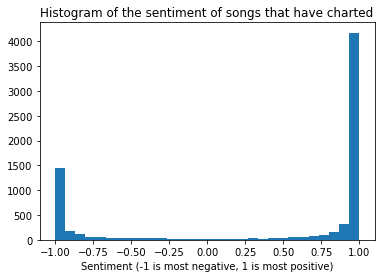

In [26]:
plt.hist(compound_scores, bins=30)
plt.title("Histogram of the sentiment of songs that have charted")
plt.xlabel("Sentiment (-1 is most negative, 1 is most positive)")